### The Kaggle link for Detail problem=https://www.kaggle.com/mirichoi0218/insurance

# Importing all Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading  Data

In [49]:
data=pd.read_csv("insurance.csv")

In [50]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
data.shape

(1338, 7)

In [53]:
#Unique values in data
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [54]:
#one hot ecoding data
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes

In [55]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


# Check distribution and correlation

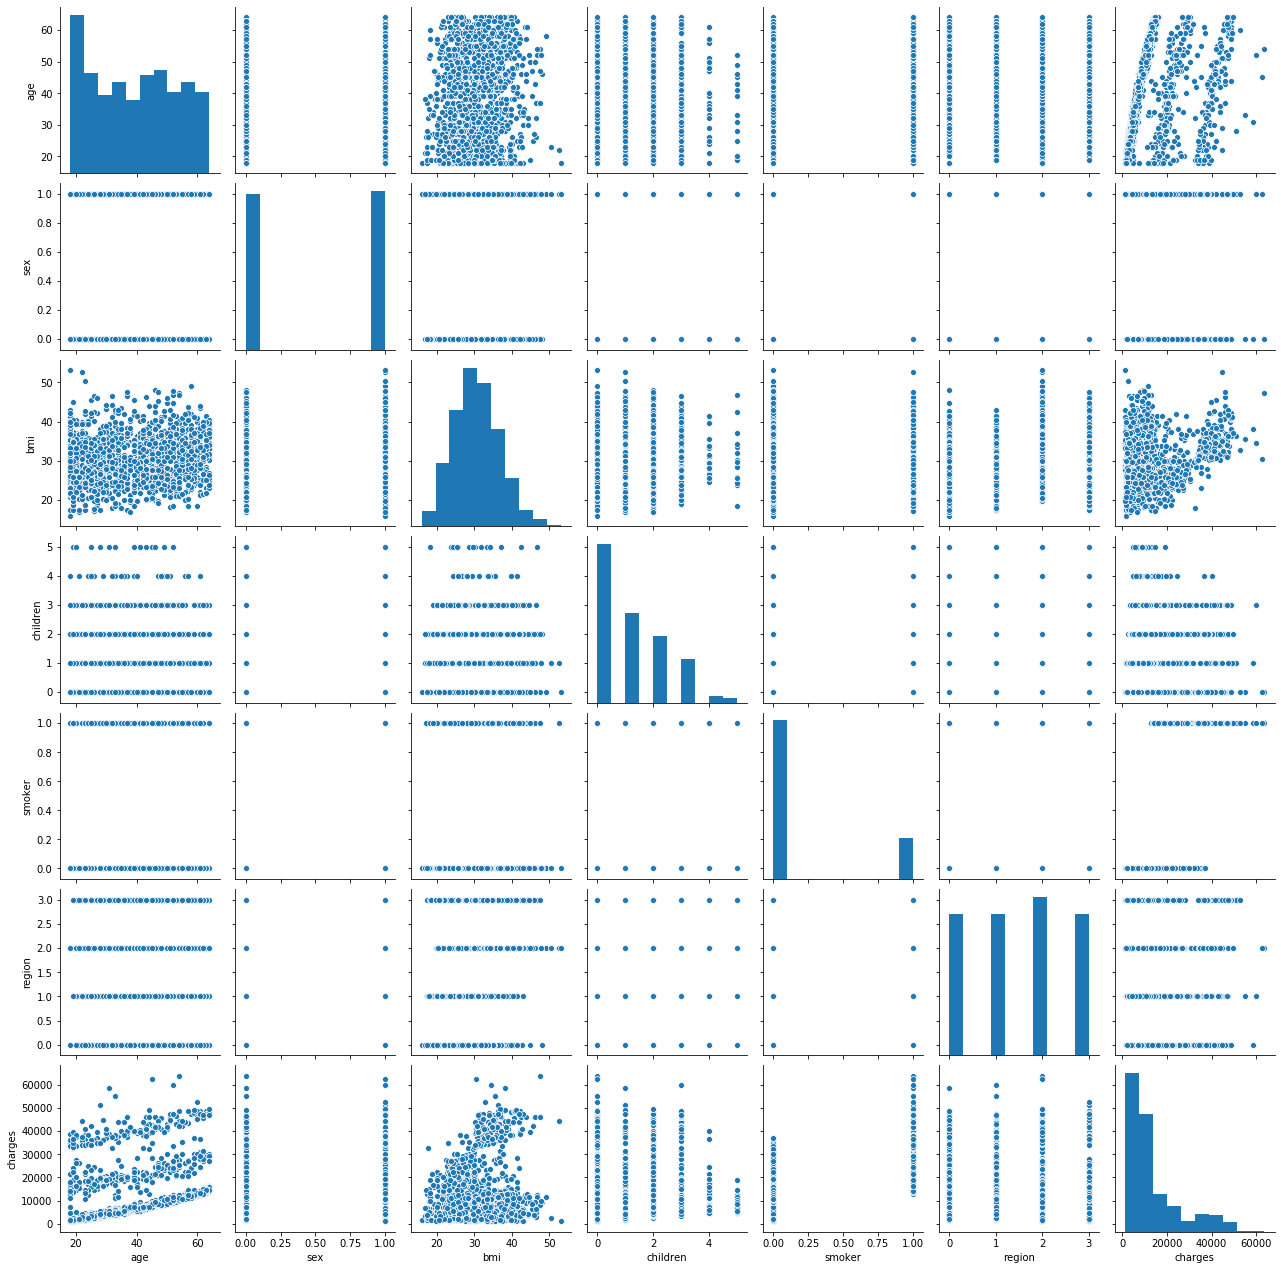

In [56]:
#Distribution of data
import seaborn as sns
sns.pairplot(data)

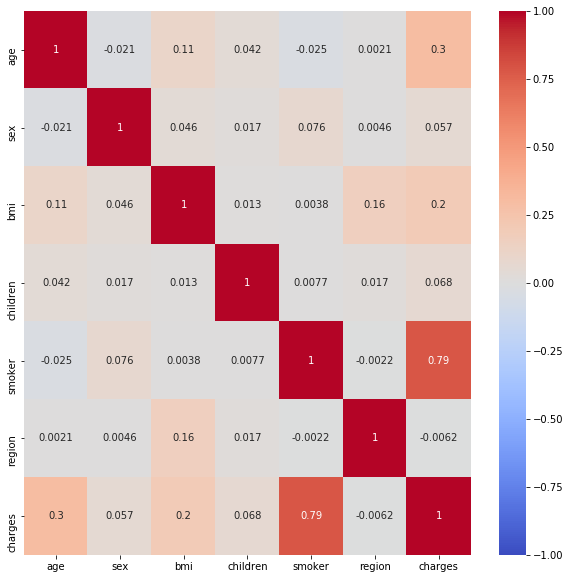

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,cmap='coolwarm')

# Splitting  data into train and test

In [58]:
X=data.drop(columns=['charges'])
y=data['charges']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

# Training a model
#### The GridSearch cv used for hyperparameter tunning in gpu google coab

In [60]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(max_depth=4,random_state=32,max_features='auto',min_samples_leaf=4,min_samples_split=5)

In [61]:
rand_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=32, verbose=0, warm_start=False)

In [62]:
# saving the model to the local file system

import pickle
filename = 'insurance_model.pickle'
pickle.dump(rand_reg, open(filename, 'wb'))


In [63]:
rand_reg = pickle.load(open(filename, 'rb'))

# Evaluation of model

In [64]:
y_predict=rand_reg.predict(X_test)

In [65]:
rand_reg.score(X_test, Y_test)

0.8941156262666692

In [66]:
from sklearn import metrics
from math import sqrt
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,y_predict))) 

RMSE: 4008.9976341357697


In [67]:
df=pd.DataFrame({"test":Y_test,"predict":y_predict})
df['index'] = range(1, len(df) + 1)

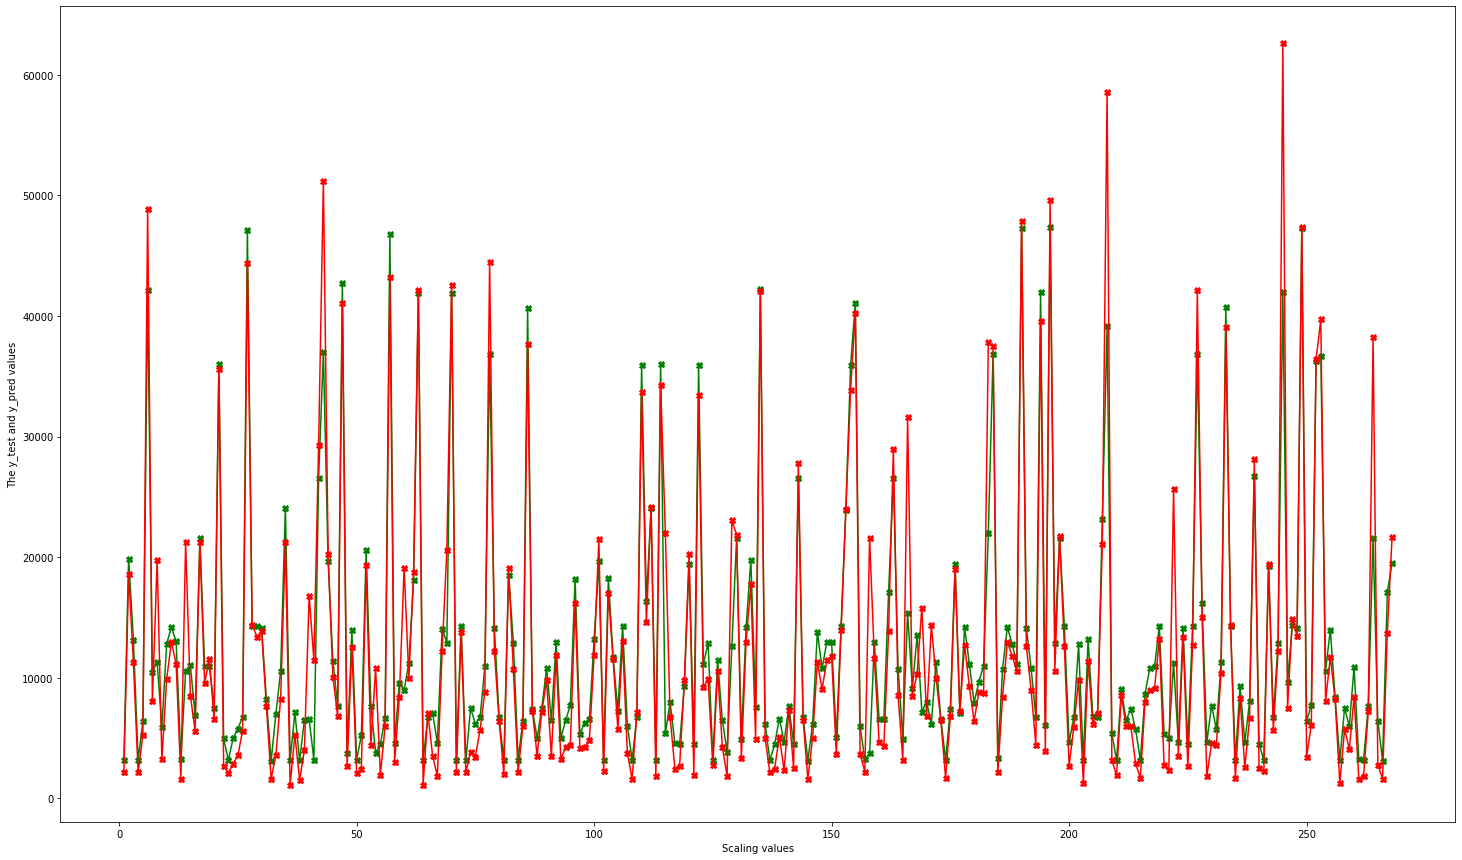

In [68]:
plt.figure(figsize=(25,15))
plt.xlabel("Scaling values")
plt.ylabel("The y_test and y_pred values")
plt.plot(df['index'],y_predict, color="green", marker = "X")
plt.plot(df['index'],Y_test, color="red", marker = "X")
plt.show()

In [69]:
rand_reg.predict([[18,1,33.770,1,0,2]])

array([4719.54196127])

In [3]:
s="omkar=1"
int(s.split("=")[1])

1